In [1]:
import pandas as pd
import seaborn as sn
# funcoes usadas dos pacotes numpy e matplotlib
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [2]:
data = pd.read_csv("comentarios.csv", sep=';')#, header=None)
data = data.loc[data['app'] == "br.gov.serpro.cnhe"]


In [3]:
print(data)

                       app              userName  \
290630  br.gov.serpro.cnhe           Val Genival   
290631  br.gov.serpro.cnhe          Lucas Araújo   
290632  br.gov.serpro.cnhe          Belo ubatuba   
290633  br.gov.serpro.cnhe    Nelson Paiva Paiva   
290634  br.gov.serpro.cnhe      Welliton Pereira   
...                    ...                   ...   
718811  br.gov.serpro.cnhe        GarciaM Brasil   
718812  br.gov.serpro.cnhe      Alexandre Jardim   
718813  br.gov.serpro.cnhe    Mauricio Cerqueira   
718814  br.gov.serpro.cnhe                   J N   
718815  br.gov.serpro.cnhe  Um usuário do Google   

                                                  content  score  \
290630                               Excelente aplicativo      5   
290631                       O aplicativo é horrível!! 👎👎      1   
290632                                              Ótimo      5   
290633  Não consigo recuperar minha senha, e não me in...      1   
290634                             

In [4]:
data["reviewCreatedVersionAux"] = data["reviewCreatedVersion"].str[0]
data["reviewCreatedVersionAux"] = pd.to_numeric(data["reviewCreatedVersionAux"])
data = data[data['reviewCreatedVersionAux'].notna()]
data = data[data['score'].notna()]
data = data[data['thumbsUpCount'].notna()]

In [5]:
print(data)

                       app              userName  \
290630  br.gov.serpro.cnhe           Val Genival   
290631  br.gov.serpro.cnhe          Lucas Araújo   
290632  br.gov.serpro.cnhe          Belo ubatuba   
290633  br.gov.serpro.cnhe    Nelson Paiva Paiva   
290634  br.gov.serpro.cnhe      Welliton Pereira   
...                    ...                   ...   
718809  br.gov.serpro.cnhe        Lazaro Antonio   
718810  br.gov.serpro.cnhe        Gleidimar Luiz   
718811  br.gov.serpro.cnhe        GarciaM Brasil   
718813  br.gov.serpro.cnhe    Mauricio Cerqueira   
718815  br.gov.serpro.cnhe  Um usuário do Google   

                                                  content  score  \
290630                               Excelente aplicativo      5   
290631                       O aplicativo é horrível!! 👎👎      1   
290632                                              Ótimo      5   
290633  Não consigo recuperar minha senha, e não me in...      1   
290634                             

In [6]:
correlation = data.corr()

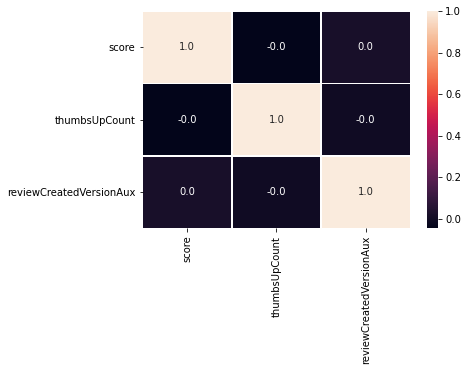

In [7]:
lot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

In [8]:
data["reviewCreatedVersionAux"].corr(data["score"])

0.018194968586998348

In [9]:
data.to_csv("comentarios_2.csv", sep=';')

In [10]:
versao1 = data.loc[data['reviewCreatedVersionAux'] == 1.0]
versao2 = data.loc[data['reviewCreatedVersionAux'] == 2.0]
versao3 = data.loc[data['reviewCreatedVersionAux'] == 3.0]
versao4 = data.loc[data['reviewCreatedVersionAux'] == 4.0]
versao5 = data.loc[data['reviewCreatedVersionAux'] == 5.0]

In [12]:
versao1.describe()

,score,thumbsUpCount,reviewCreatedVersionAux
count,2512.000000,2512.000000,2512.0
mean,2.385748,1.752787,1.0
std,1.587136,12.995381,0.0
min,1.000000,0.000000,1.0
25%,1.000000,0.000000,1.0
50%,2.000000,0.000000,1.0
75%,4.000000,0.000000,1.0
max,5.000000,259.000000,1.0


In [13]:
versao2.describe()

,score,thumbsUpCount,reviewCreatedVersionAux
count,59374.000000,59374.000000,59374.0
mean,4.469515,0.251693,2.0
std,1.146520,7.130243,0.0
min,1.000000,0.000000,2.0
25%,5.000000,0.000000,2.0
50%,5.000000,0.000000,2.0
75%,5.000000,0.000000,2.0
max,5.000000,664.000000,2.0


In [14]:
versao3.describe()

,score,thumbsUpCount,reviewCreatedVersionAux
count,151822.000000,151822.000000,151822.0
mean,4.605531,0.126009,3.0
std,0.968594,5.160705,0.0
min,1.000000,0.000000,3.0
25%,5.000000,0.000000,3.0
50%,5.000000,0.000000,3.0
75%,5.000000,0.000000,3.0
max,5.000000,966.000000,3.0


In [15]:
versao4.describe()

,score,thumbsUpCount,reviewCreatedVersionAux
count,181891.000000,181891.000000,181891.0
mean,4.500789,0.211852,4.0
std,1.124008,7.149620,0.0
min,1.000000,0.000000,4.0
25%,5.000000,0.000000,4.0
50%,5.000000,0.000000,4.0
75%,5.000000,0.000000,4.0
max,5.000000,959.000000,4.0


In [16]:
versao5.describe()

,score,thumbsUpCount,reviewCreatedVersionAux
count,9930.000000,9930.000000,9930.0
mean,4.304330,0.201913,5.0
std,1.347562,4.188746,0.0
min,1.000000,0.000000,5.0
25%,4.000000,0.000000,5.0
50%,5.000000,0.000000,5.0
75%,5.000000,0.000000,5.0
max,5.000000,203.000000,5.0


In [83]:
versao1["score"].mean()

2.385748407643312

In [70]:
versao2["score"].mean()

4.469515276046755

In [71]:
versao3["score"].mean()

4.605531477651461

In [72]:
versao4["score"].mean()

4.50078893403192

In [73]:
versao5["score"].mean()

4.304330312185297

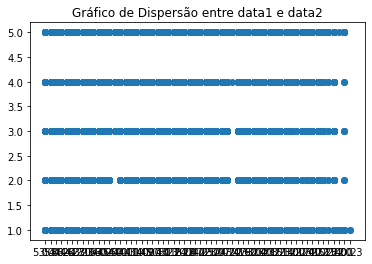

In [97]:
pyplot.scatter(data["reviewCreatedVersion"], data["score"])
pyplot.title('Gráfico de Dispersão entre data1 e data2')
pyplot.show()